In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [57]:
df = pd.read_csv("../Dataset/Algerian_forest_fires_category_cleaned_dataset.csv")

In [58]:
print(df.info())
print()
print(df['Classes'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int64  
 11  Region       243 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 22.9 KB
None

Classes
1    137
0    106
Name: count, dtype: int64


In [59]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [60]:
## Independent and dependant feature
X =df.drop('FWI',axis=1)
y=df['FWI']

In [61]:
## train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [62]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((182, 11), (61, 11), (182,), (61,))

In [63]:
## Feature selection based on correlation, here higher the percentage between two features higher is the correlation.
X_train.corr()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

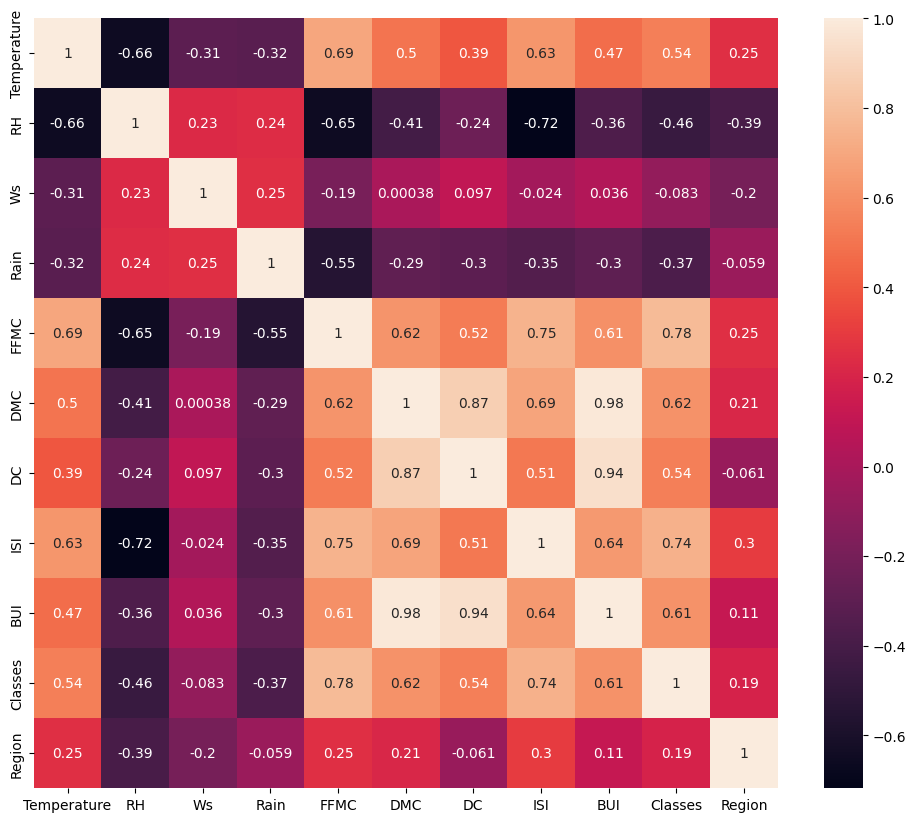

In [64]:
## Check for multicolinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [65]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]>threshold):
                print((i,j),corr_matrix.iloc[i,j])
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [66]:
corr_features = correlation(X_train,0.80)

(6, 5) 0.8686472047539086
(8, 5) 0.9831752542959249
(8, 6) 0.9424144019919156


In [67]:
## drop features with high correlation
X_train.drop(corr_features,axis=1,inplace=True,)
X_test.drop(corr_features,axis=1,inplace=True)

In [68]:
X_train.shape, X_test.shape

((182, 9), (61, 9))

In [69]:
## Standardisation or Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # for initial fitting of mean and std of the data
X_test_scaled = scaler.transform(X_test)  # take mean and std from the exisiting fit_transform

In [70]:
X_train_scaled.shape

(182, 9)

Text(0.5, 1.0, 'xtrain after scaled')

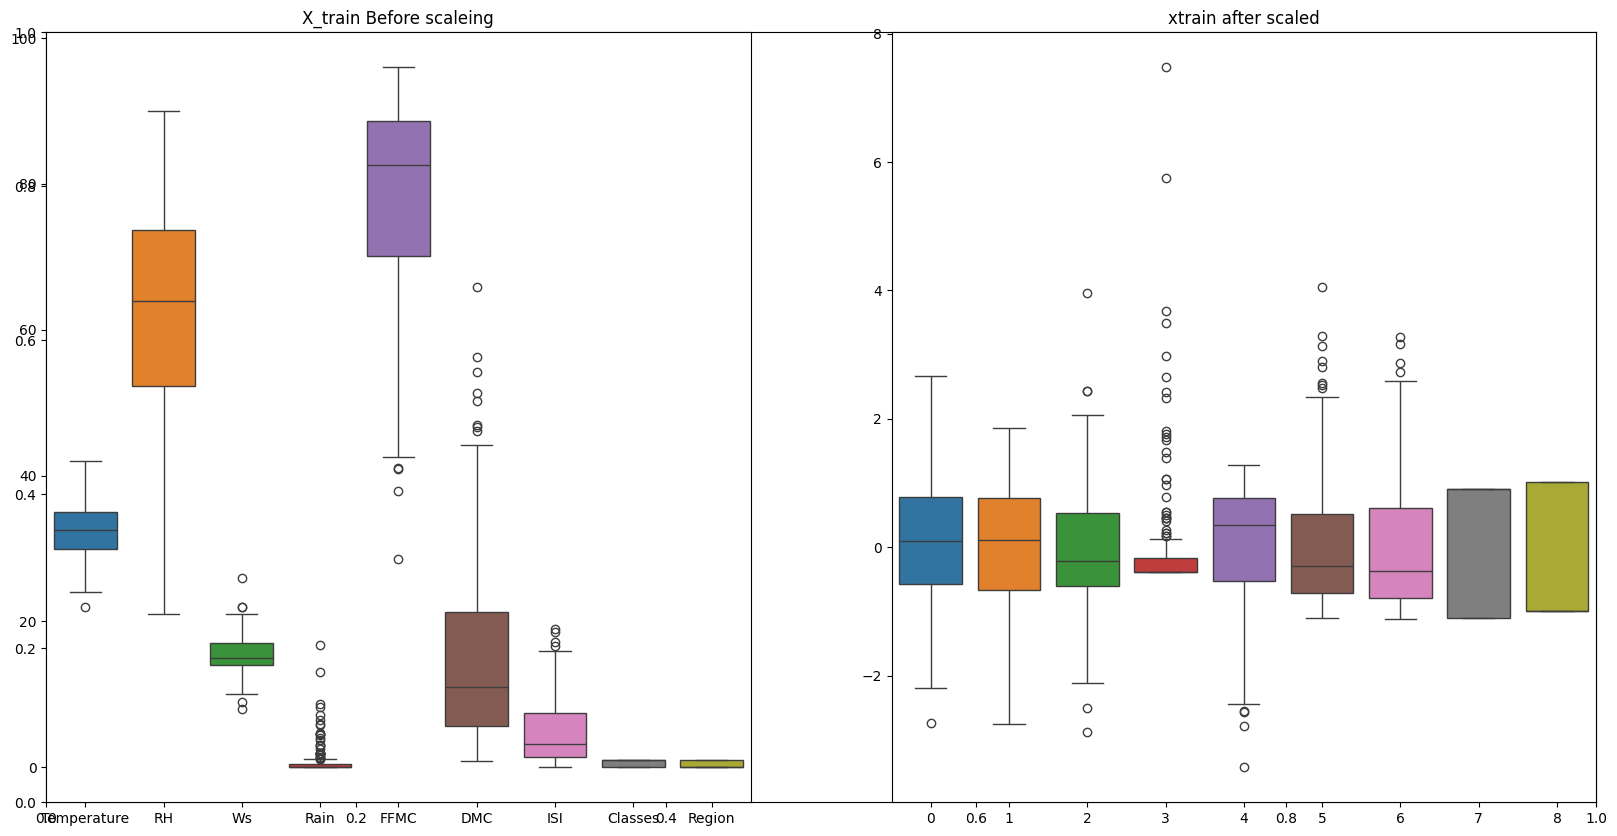

In [71]:
# Box plot to understand scaler

plt.subplots(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train Before scaleing')

plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('xtrain after scaled')

## Linear Regression

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

Mean absolute error :  0.546823646524997 
R2Score :  0.9847657384266951


Text(0, 0.5, 'YPred')

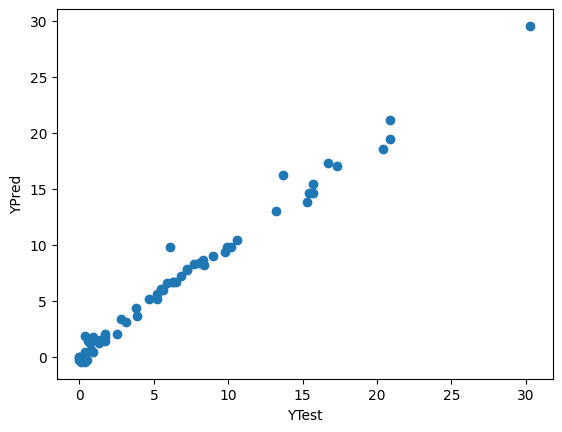

In [73]:
linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test,y_pred)

print("Mean absolute error : ", mae,"\nR2Score : ",score)

plt.scatter(y_test,y_pred)
plt.xlabel("YTest")
plt.ylabel("YPred")

## Laso Regression

Mean absolute error :  1.133175994914409 
R2Score :  0.9492020263112388


Text(0, 0.5, 'YPred')

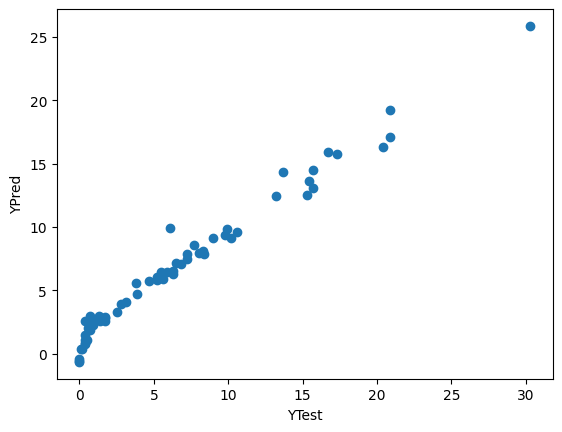

In [74]:
## Laso Regression
from sklearn.linear_model import Lasso

lasso_model = Lasso()
lasso_model.fit(X_train_scaled,y_train)
y_pred = lasso_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test,y_pred)

print("Mean absolute error : ", mae,"\nR2Score : ",score)

plt.scatter(y_test,y_pred)
plt.xlabel("YTest")
plt.ylabel("YPred")

## Ridge Regression model

Mean absolute error :  0.5642305340105691 
R2Score :  0.9842993364555513


Text(0, 0.5, 'YPred')

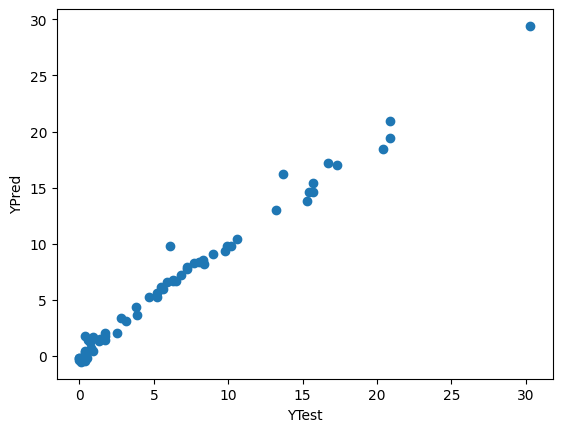

In [75]:
## Ridge Regression model
from sklearn.linear_model import Ridge

ridge_model = Ridge()
ridge_model.fit(X_train_scaled,y_train)
y_pred = ridge_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test,y_pred)

print("Mean absolute error : ", mae,"\nR2Score : ",score)

plt.scatter(y_test,y_pred)
plt.xlabel("YTest")
plt.ylabel("YPred")

## Elastic net model

Mean absolute error :  1.8822353634896 
R2Score :  0.8753460589519703


Text(0, 0.5, 'YPred')

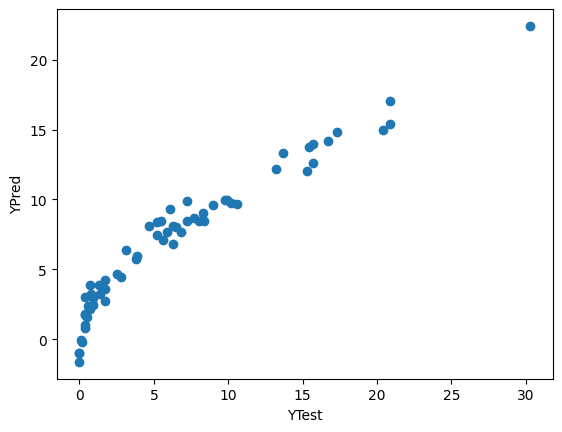

In [76]:
## Elastic net model
from sklearn.linear_model import ElasticNet

Elasticnet_model = ElasticNet()
Elasticnet_model.fit(X_train_scaled,y_train)
y_pred = Elasticnet_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test,y_pred)

print("Mean absolute error : ", mae,"\nR2Score : ",score)

plt.scatter(y_test,y_pred)
plt.xlabel("YTest")
plt.ylabel("YPred")

In above lasso, ridge, elastic net there may be overfittings over overfitting. That may be reason for higher accuracy and higher mae. Inorder to find the best hyperparameters we can use cross validation techniques 

## Cross Validation

### Lasso Cross validation

In [77]:
## Lasso Cross validation
from sklearn.linear_model import LassoCV

lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)
lassocv.predict(X_test_scaled)


array([ 8.17490595,  7.68312478, -0.25676525,  4.72643402,  6.78715772,
        1.77624325,  2.23148094,  7.64057821,  1.99176323,  3.39941035,
        0.62808928,  9.95945488,  9.36168319, 16.98503659, 18.28488762,
        1.61644108,  1.62751276, -0.6415713 ,  7.28510526,  3.10926518,
        1.95541903,  0.18069335,  6.47563129,  0.14318503, 20.99597009,
        5.11755206,  5.86208849,  9.75914403, -0.77037467,  9.91838577,
        6.72277075, -0.31776007, 10.31109643, 14.4365551 ,  1.71022677,
        0.83439752,  2.03414915,  5.97488529, -0.6263644 , -0.56200288,
        6.47253729,  2.07971408,  8.46741557, -0.8464481 , 15.40443856,
        8.32941189,  8.48782486,  1.44030355, 13.02752812,  1.20911545,
       29.08623849,  5.49737681, 17.15937199, 19.28890096, 13.71102991,
       16.05355549,  0.99056448,  9.0873725 ,  3.84455993, 14.43991192,
        5.23034139])

In [78]:
print("best Alpha value of Lasso : ", lassocv.alpha_)
print("All tried Alpha value of Lasso : ", lassocv.alphas_)


best Alpha value of Lasso :  0.05725391318234408
All tried Alpha value of Lasso :  [7.05853002 6.58280872 6.13914944 5.72539132 5.33951911 4.97965339
 4.64404142 4.33104857 4.03915039 3.76692517 3.51304702 3.27627941
 3.05546914 2.84954075 2.65749124 2.47838523 2.31135036 2.15557308
 2.01029467 1.87480753 1.74845178 1.63061198 1.52071419 1.41822315
 1.32263965 1.23349817 1.15036452 1.0728338  1.00052839 0.93309613
 0.87020857 0.81155943 0.75686304 0.705853   0.65828087 0.61391494
 0.57253913 0.53395191 0.49796534 0.46440414 0.43310486 0.40391504
 0.37669252 0.3513047  0.32762794 0.30554691 0.28495408 0.26574912
 0.24783852 0.23113504 0.21555731 0.20102947 0.18748075 0.17484518
 0.1630612  0.15207142 0.14182231 0.13226397 0.12334982 0.11503645
 0.10728338 0.10005284 0.09330961 0.08702086 0.08115594 0.0756863
 0.0705853  0.06582809 0.06139149 0.05725391 0.05339519 0.04979653
 0.04644041 0.04331049 0.0403915  0.03766925 0.03513047 0.03276279
 0.03055469 0.02849541 0.02657491 0.02478385 0.

In [79]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

In [80]:
lassocv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': False}

Mean absolute error of lassocv :  0.6199701158263431
score of lassocv :  0.9820946715928275


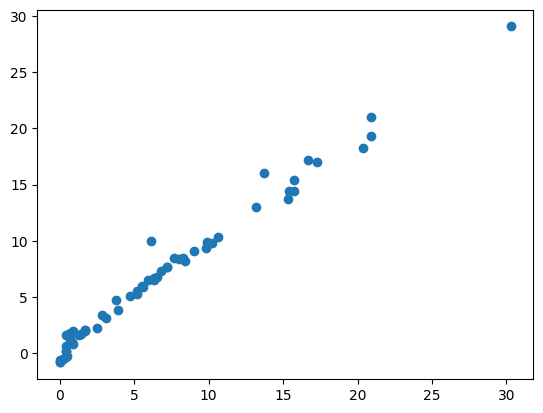

In [81]:
y_pred = lassocv.predict(X_test_scaled)
score = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("Mean absolute error of lassocv : ",mae)
print("score of lassocv : ",score)
plt.scatter(y_test,y_pred)

### Ridge CV

Mean Abs error :  0.5642305340105691 
 score of ridge:  0.9842993364555513


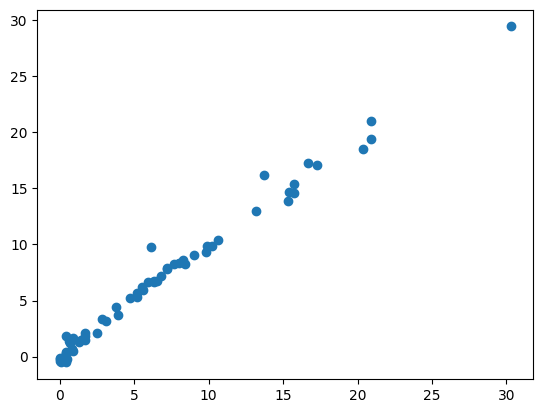

In [82]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)

ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Abs error : ", mae, "\n score of ridge: ",score)
plt.scatter(y_test,y_pred)

In [83]:
print(ridgecv.alpha_)
ridgecv.alphas

1.0


(0.1, 1.0, 10.0)

In [84]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

### Elasticnet CV

Mean Abs error :  0.6575946731430901 
 score of ridge:  0.9814217587854941


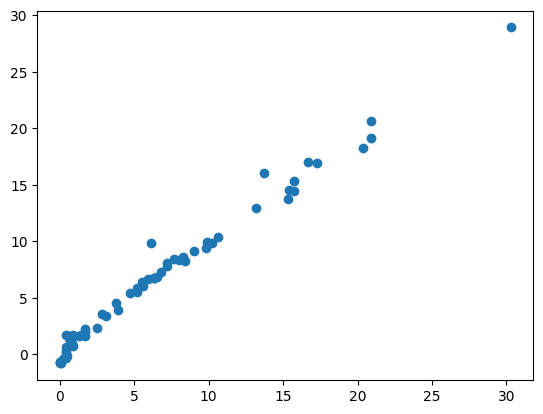

In [85]:
from sklearn.linear_model import ElasticNetCV
elasticcv = ElasticNetCV(cv=5)

elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Abs error : ", mae, "\n score of ridge: ",score)
plt.scatter(y_test,y_pred)

In [89]:
print(elasticcv.alpha_)
elasticcv.alphas_

0.04311146156383891


array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11